**Introduction**

The project is to work on Football data set which has 30697 records. These details are of a particular player. The data spans from  1996-2016 for a player. The project is to analyze every column, its relationship with other columns, and how well it will help in predicting.
Therefore one of the most important tasks of this project is dimensionality reduction or eliminate the features that will not contribute to prediction. The preprocessing of the important feature is another major task to get the right prediction.

Here we will go 1 column at a time. We will study the column along with the is_goal column to get a trend/pattern. We will also we if the given column alone can help in predicting scoring of a goal or there is a dependency of other columns to make the prediction more meaningful and better.

The above analyses will help us to understand the importance of the given column in predicting ie whether the column should be included in the predictive algorithm.

If the column is important, then based on the above analyses we will define a strategy of preprocessing the column data.


**1.Upload the data set into a data frame** 

In [0]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
import calendar
import matplotlib.pyplot as plt; plt.rcdefaults()
sns.set_style('whitegrid')
import math
pd.set_option('display.max_columns', None)


In [0]:
#Read the data in dataset

df = pd.read_csv("data.csv")

**2. Run the below query to get list of columns in the dataset**

In [0]:
df.columns

Index(['Unnamed: 0', 'match_event_id', 'location_x', 'location_y',
       'remaining_min', 'power_of_shot', 'knockout_match', 'game_season',
       'remaining_sec', 'distance_of_shot', 'is_goal', 'area_of_shot',
       'shot_basics', 'range_of_shot', 'team_name', 'date_of_game',
       'home/away', 'shot_id_number', 'lat/lng', 'type_of_shot',
       'type_of_combined_shot', 'match_id', 'team_id', 'remaining_min.1',
       'power_of_shot.1', 'knockout_match.1', 'remaining_sec.1',
       'distance_of_shot.1'],
      dtype='object')

**3.Run the below query to get the data type of every column**

In [0]:
df.dtypes

Unnamed: 0                 int64
match_event_id           float64
location_x               float64
location_y               float64
remaining_min            float64
power_of_shot            float64
knockout_match           float64
game_season               object
remaining_sec            float64
distance_of_shot         float64
is_goal                  float64
area_of_shot              object
shot_basics               object
range_of_shot             object
team_name                 object
date_of_game              object
shot_id_number           float64
lat/lng                   object
type_of_shot              object
type_of_combined_shot     object
match_id                   int64
team_id                    int64
remaining_min.1          float64
power_of_shot.1          float64
knockout_match.1         float64
remaining_sec.1          float64
distance_of_shot.1       float64
opponent                  object
dtype: object

**4.From here on we will study every column. Will try to establish a relationship with the is_goal and other columns if possible. Decide the importance of the feature in the predictive model. At the end based on the study, we will define a strategy of preprocessing the column data.**

**4a) MATCH_EVENT_ID AND MATCH_ID COLUMNS**

Every match played is given a number/id, this id is provided in match_id column.

On closely looking at the data set we see that for a given match_id there are many match_event_id associated. So we can say that each match_event_id corresponds to some event of that match_id, here every shot hit is considered as an event. But the match_event_id values do not provide any information about the shot that can help us predict the goal. **This information ie match_event_id column,  will have no contribution in helping us determine whether the given event/shot was a goal or not. Therefore this column will not be included in the predictive algorithm.**

Based on the above, the match_id column alone will not help us predict anything about goal scoring. The column that tightly relates to this column is date_of_game(refer section 4h for more details). Therefore we should study match_id column along with the date_of_game column, the correlation of match_id column will be given in detail in the date_of_game section.

**This column is required in building the predictive model.**

**The match_id column has no null values so we do not require any preprocessing of the column data.**





**4b) Location_x,Location_y ,lat/lng columns**

Both these columns indicate some co-ordinate of the ground, the location from where the ball was hit. In a way, these columns seem important in predicting ie at what coordinates x and y from the goal post have better prospects of scoring a goal. But after studying the other columns we can see that distance_of_shot gives the same information ie at what distance from the goal post the ball was hit to score a goal/not a goal. 

Graphically the relationship of distance_of_shot and these columns are shown below. Here we have shown with only 1 values of distance_of shot=25.

As we see from the graph below, the red dots are distance=25 represented as x and y coordinates. In a way, we can say that these co-ordinates represent the distance from the goal post from where the goal was score/not scored.

**Similar explanation we have for lat/lng column.**

Based on the above study we consider distance_of_shot column over these 3 columns. The reason being **a)** This will help in feature reduction at the same time preserving the information **b)** other columns are related to distance_of shot (area_of_shot,range_of_shot,shot_basics.Details are explained in the below sections,**4f**).

**Therefore location_x ,location_y ,lat/lng columns will not be included in the predictive algorithm**




Text(0.5, 1.0, 'loc_x and loc_y for distance_of_shot=25')

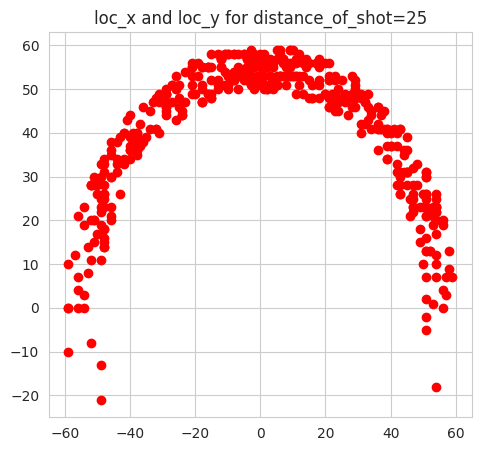

In [0]:
#Create data frame with columns distance_of_shot,location_x,location_y 
df_loc=df[['distance_of_shot','location_x','location_y']].copy()

#Create data frame containing location_x ,location_y data for distance_of_shot=25
dist_25=df_loc[(df_loc.distance_of_shot==25.0)].copy()


#Plot a graph to show the coordinates for distance=25
alpha = 0.02
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.scatter(dist_25.location_x, dist_25.location_y, color='red', alpha=1)
plt.title('loc_x and loc_y for distance_of_shot=25')

**4c)Remaining_min and Remaining_sec columns**

These columns tell you the time in min/sec left before the match is finished. Indirectly this gives the information about when the goal was scored ie how many mins/sec before the finish of the match the goal was scored. With the basic observation, this column is important in predicting the scoring of the goal. But a detailed analysis is required for that we need to process the columns data. The processing will be done **a)** to replace the nan values of both the columns(count of nan values are given below. **b)** Feature reduction ie transform the min to sec and add the output to the remaining_sec. This way we will require only remaining_sec columns to represent the information of both the columns. We will then rename the remaining_sec column to more meaning full(time_in_sec)

Nan values,remaining_min =1562 

Nan values, remaining_sec =1594

Once preprocessing is completed we will make a deeper analysis of the remaining_sec and is_goal column to see how they are related and how well it will help in predicting.

**Preprocessing**

**a:-** The data set has a duplicate column (remaining_min.1,remaining_sec.1) corresponding to the above original columns. These duplicates columns will be used to replace the nan values of the original columns. Therefore for a given row, if the original column value has nan, then the value of their corresponding duplicate column will be replaced. There are chances that for a given row both original and duplicate will have nan. For such a scenario, we will take the mode of the original column and replace the nan. This check and process are done for both the original columns. For both the above columns the query is given below.
**b:-** Once we have replaced with nan, we will convert the remaining_min columns to sec. The output is then added to the remaining_sec column. The remaining_sec column is then renamed to 'time_in_sec. Post this the original columns are dropped.




In [0]:
#Replace the NaN values from remaining_sec.1 column
for ind,r in df.iterrows():
    if math.isnan(r.get('remaining_sec')):
        if math.isnan(r.get('remaining_sec.1')) or r.get('remaining_sec.1')<60: # get values from duplicate column only if its <60.Reason, seconds cannot be more than 60.
            df.at[ind,'remaining_sec']=r.get('remaining_sec.1') 
            
print('Nan values before mode for   ',df[['remaining_sec']].isnull().sum()) 

#Replacing value with mode of remainig_sec,since there are still 330 row with NaN.May be both the columns can have  NaN or 
#values of remaining_sec.1 are >60 therefore it cannot replace NaN of remaining_sec column

mode_val_sec=df['remaining_sec'].mode().values[0]
df['remaining_sec'] = df['remaining_sec'].replace({ np.nan:mode_val_sec})

Nan values before mode for    remaining_sec    330
dtype: int64


In [0]:
# Replacing the NaN values from remaining_min.1 column
for ind,r in df.iterrows():
    
    if math.isnan(r.get('remaining_min')):
        df.at[ind,'remaining_min']=r.get('remaining_min.1')
        
print('Nan values before mode for ',df[['remaining_min']].isnull().sum()) 

#Replacing value with mode of remainig_min,since there are still 81 row where both the columns have NaN

mode_val_min=df['remaining_min'].mode().values[0]
df['remaining_min'] = df['remaining_min'].replace({ np.nan:mode_val_min})

Nan values before mode for  remaining_min    81
dtype: int64


In [0]:
# Convert the remaining_min into sec. Add this and  remaining_sec column to a new column 'time_in_sec'.
df['time_in_sec'] = 60 * df['remaining_min'] + df['remaining_sec']

In [0]:
print('Nan values for     ',df[['remaining_sec']].isnull().sum()) 
print('Nan values for     ',df[['remaining_min']].isnull().sum()) 

Nan values for      remaining_sec    0
dtype: int64
Nan values for      remaining_min    0
dtype: int64


In [0]:
#Drop the remaining_min  and remaining_sec columns thereafter.time_in_sec column will be used for further analysis.
df.drop('remaining_min', axis=1, inplace=True)
df.drop('remaining_sec', axis=1, inplace=True)

**Analysis**

To check how the new column time_in_sec is related to the is_goal column, we will run the below query. As you see from the below output the last few seconds (0-120 sec) have the maximum goal scored,  especially the last few secs (0-1 sec) have the highest number of goal scored. This indicates that the last few seconds of the match are very crucial and deciding factors for the scoring of a  goal.  Based on this we can say that this column will help in predicting scoring of a goal

**This column will be included in the predictive algorithm.**

In [0]:
df_time=df[['time_in_sec','is_goal']]

#The below given query output shows that the maximum number of goals are scored in last few seconds.
df_time['time_in_sec'][df_time['is_goal']==1].value_counts()

0.0       93
1.0       46
4.0       37
37.0      35
120.0     34
          ..
3709.4     1
2769.4     1
4126.4     1
2684.4     1
3302.4     1
Name: time_in_sec, Length: 859, dtype: int64

In [0]:
df_time['time_in_sec'][df_time['is_goal']==0].value_counts()

**4d) Power_of_shot column**

This column tells you the power at which the ball was hit. The hitting of the ball can be for multiple reasons like shot for direct goal, pass by shot or penalty shot, etc. Whatever be the reason the impact of power_of shot will have also depend on the distance, the range, the area from the goal post from where the ball was hit. Therefore there is indirect dependence of this column with distance_of_shot, range_of_shot, area_of_shot,shot_basics,etc. 

**Therefore the performance of the predictive model will be tested and checked by inclusion and exclusion of this column. In either case, we need to preprocess the data of the column ie replace the nan values with a meaning full values.**

**Preprocess**

This dataset has a duplicate column(power_of_shot.1) corresponding to the original power_of_shot. This duplicate column will be used to replace the nan values of the original column. Therefore for a given row, if the original column value has nan, then the value of the corresponding duplicate column will be replaced. There are chances that for a given row both original and duplicate will have nan. For such a scenario, we will take the mode of the original column and replace the nan. 

Nan values ,power_of_shot=1486

The query to replace the nan value is given below



In [0]:
unq_val=df.power_of_shot.unique() # unique values of power_of_shot column

#Replace nan values of the original column with duplicates column values
for ind,r in df.iterrows():
    if math.isnan(r.get('power_of_shot')):
        if r.get('power_of_shot.1') in unq_val: # The value of the duplicate column should be range as per original column
            df.at[ind,'power_of_shot']=r.get('power_of_shot.1')


print('Nan values before replacing for ',df[['power_of_shot']].isnull().sum()) 

#Since there are still 357 row with NaN.May be both the columns have  NaN or 
#power_of_shot.1 does not have values in the range of 1-7 therefore it cannot replace NaN of power_of_shot column.Therefore replacing value with the mode of power_of_shot column

mode_val_pow=df['power_of_shot'].mode().values[0]
df['power_of_shot'] = df['power_of_shot'].replace({ np.nan:mode_val_pow})

Nan values before mode for  power_of_shot    357
dtype: int64


In [0]:
print('Nan values for after replacing    ',df[['power_of_shot']].isnull().sum()) 

Nan values for      power_of_shot    0
dtype: int64


**Analysis**

As we can see from the below output power_of_shot (1-4) has a very high number of goals scored. But as mentioned above that this column as an indirect dependency of other columns as well. **Therefore we will test the predictive model performance with inclusion and exclusion o this column.**

In [0]:
  df_power=df[['power_of_shot','is_goal']]
  #The below query shows the power shot with maximumn goal's scored
df_power.groupby(['power_of_shot','is_goal']).agg({'is_goal':"count"})

is_goal
power_of_shot is_goal         
1.0           0.0         3372
              1.0         2934
2.0           0.0         2914
              1.0         2376
3.0           0.0         3760
              1.0         3094
4.0           0.0         3338
              1.0         2346
5.0           0.0          146
              1.0          114
6.0           0.0           16
              1.0           12
7.0           0.0            4
              1.0            3

**4e) Knockout_match**

They are the matches where a team is eliminated from the tournament post losing that game. Therefore these matches are very crucial to remain in the tournament. On pre-analysis of the existing data(output as given below) of this column , we can see that the goals scored is propertianate to the number of matches played for both knockout and normal match,ie the performance of the player is consistent. But as we know that these are important mataches therefore we will study the column with other important columns like distance_of_shot,area_of_shot etc.

**Preprocess**

This dataset has a duplicate column(knockout_match.1) corresponding to the original power_of_shot. This duplicate column will be used to replace the nan values of the original column. Therefore for a given row, if the original column value has nan, then the value of the corresponding duplicate column will be replaced. There are chances that for a given row both original and duplicate will have nan. For such a scenario, we will take the mode of the original column and replace the nan.

Nan values ,knockout_match=1517

The query to replace the nan value is given below

In [0]:
knockout_pre=df[['knockout_match','is_goal']].copy()
knockout_pre.groupby(['knockout_match','is_goal']).agg({'is_goal':"count"})

is_goal
knockout_match is_goal         
0.0            0.0        11025
               1.0         8809
1.0            0.0         1875
               1.0         1508

In [0]:

knock_val=df.knockout_match.unique() # unique values of knockout_match column

#Replace nan values of the original column with duplicates column values
for ind,r in df.iterrows():
    if math.isnan(r.get('knockout_match')):
        if r.get('knockout_match.1') in knock_val: #The value of the duplicate column should be range as per original column
            df.at[ind,'knockout_match']=r.get('knockout_match.1')


print('Nan values before mode for ',df[['knockout_match']].isnull().sum()) 

#Since there are still 375 row with NaN.May be both the columns have  NaN or 
#knockout_match.1 does not values as 0 or 1 therefore it cannot replace NaN of knockout_match column.Therefore replacing the value with the mode of knockout_match column


mode_val_out=df['knockout_match'].mode().values[0]
df['knockout_match'] = df['knockout_match'].replace({ np.nan:mode_val_out})

Nan values before mode for  knockout_match    375
dtype: int64


In [0]:
print('Nan values for     ',df[['knockout_match']].isnull().sum()) 

Nan values for      knockout_match    0
dtype: int64


In [0]:
#Query to analyse the data post replacing with nan values
df_knockout=df[['knockout_match','is_goal']].copy()
df_knockout.groupby(['knockout_match','is_goal']).agg({'is_goal':"count"})

is_goal
knockout_match is_goal         
0.0            0.0        11596
               1.0         9302
1.0            0.0         1954
               1.0         1577

**Analysis**

As seen from the below output,  proportionately goal scored for the knockout and normal matches are all most similar to the above. Since the column should be analyzed along with other important columns as mentioned above**, therefore, the performance of the predictive model will be tested and checked with inclusion and exclusion of this column.**

**4f) Here we will study 4 columns, distance_of_shot,area_of_shot,range_of_shot,shot_basics. We will,**


1.   **Pre-analyse individual columns.**
2.   **Establish a relationship between the columns.**
3.   **Replace nan values of distance_of_shot with duplicate column.**
4.   **Replace the nan values of area_of_shot,range_of_shot,shot_basics with respect to their corresponding distance_of_shot.**


**1.Pre-Analyse  Of Individual Columns**

**Range_of_shot**

We need to imagine the ground divided into zones/patches. This column has values like 'Less Than 8ft', '8-16 ft' etc. We can say that these are zones at a particular distance from goal post eg 'less than 8ft', from the goal post it is at a distance within 8 ft. From all the different values of this column, this value is at the least distance from the goal post followed by '8-16ft' etc. So we can say they are vertical zones of the ground divided based on how far they are from the goal post.
Therefore this column tells you from which zone the maximum number of goals were scored.
Below is the graph which indicates that the maximum number of goals were scored from 'less than 8 ft' ie nearest to the goal post.

These values alone cannot help in predicting, it will be studied along with other columns , in another sub-section as mentioned above.


In [0]:
#RUN THIS CODE TO MAKE A DATA FRAME 
range_shot_df=df[['range_of_shot','is_goal']].copy()

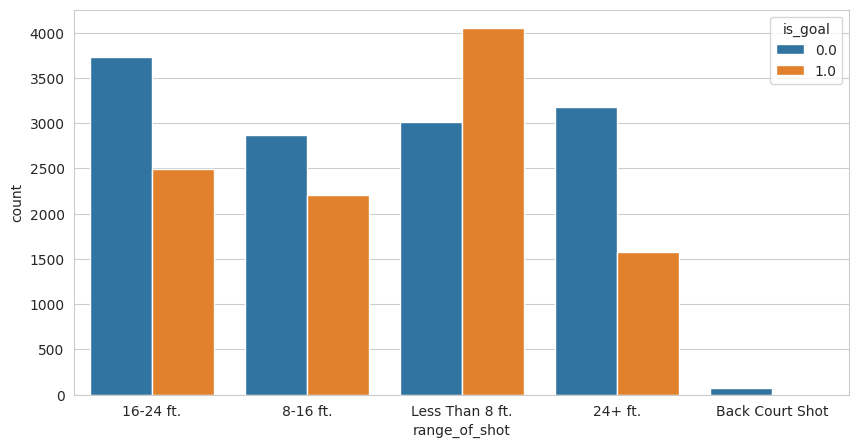

In [0]:
#GRAPH BELOW WILL SHOW RANGE FROM THE GOAL POST FROM WHERE THE MAXIMUM GOAL'S ARE SCORED

fig, ax1 = plt.subplots(figsize=(10, 5))
sns.countplot(x=range_shot_df['range_of_shot'], hue=range_shot_df['is_goal'], data=range_shot_df, ax=ax1)

**Shot_baiscs column**

As we have seen with range_of_shot, the ground is divided based on the distance from the goal post. We can imagine them as lines dividing the ground. In between the line you have sub-zones like 'Goal Area' or 'Goal Line' etc. The 'goal area' or' goal-line' are values of the shot_basics columns. So this way we can relate these 2 columns eg 'less than 8ft' is the distance from the goal post, there is a patch from the goal post to the line' less than 8ft' has 'goal area' and the line can be said as the 'goal line.' In a way, it is a sub-zone of the range_of_shot larger zone. Similarly we can relate other values of this columns.Now we can read this as a goal scored from a distance of 'less than 8ft' from the 'Goal Area/Goal Line'.
We will pre-analysis this column, the query is given below.

As seen from the graph the region 'Goal Area','Mid Range has the maximum number of goals scored.

But this column has a dependency on the columns as mentioned above, the detail, therefore, will be studied in later sub-sections.

In [0]:
#RUN THIS QUERY TO CREATE A TEMPORARY NEW DATA FRAME
shot_basics_df=df[['shot_basics','is_goal']].copy()

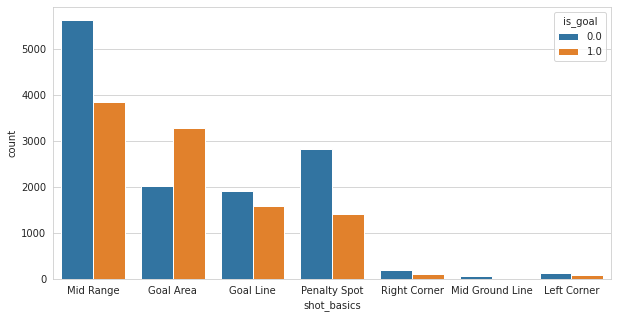

In [0]:
# GRAPH BELOW SHOW THE REGION FROM WHERE THE MAXIMUM GOAL'S WERE SCORED
fig, ax1 = plt.subplots(figsize=(10, 5))
sns.countplot(x=shot_basics_df['shot_basics'], hue=shot_basics_df['is_goal'], data=shot_basics_df, ax=ax1)

**Area_of_shot column**

Above we have tried to establish a relation between range_of_shot and shot_basics, how shot_basic fits inside range_of_shot zone. Similarly, we will try to establish a relationship with the area_of_shot column. We know that above both columns are zones/patches ie they can have location within like center, right side left side, etc. These are the values of the area_of_shot column. So now we can say eg that the goal was scored from 'less than 8ft' from the 'center' of 'goal area'.Similarly we can relate other values of this columns.
In  a way we have now established a relation between the 3 columns(range_of_shot,shot_basics,area_of_shot).

We will run the below query to pre-analyze the area_of_shot columns.

As we can see from the graph the 'Center(c)' region has the maximum goals scored.
We know that the column cannot be studied stand alone, it will be therefore studied in detail in sub-section below with other depending columns.


In [0]:
#RUN THIS CODE TO STUDY AREA_OF_SHOT COLUMN.
area_shot_df=df[['area_of_shot','is_goal']].copy()

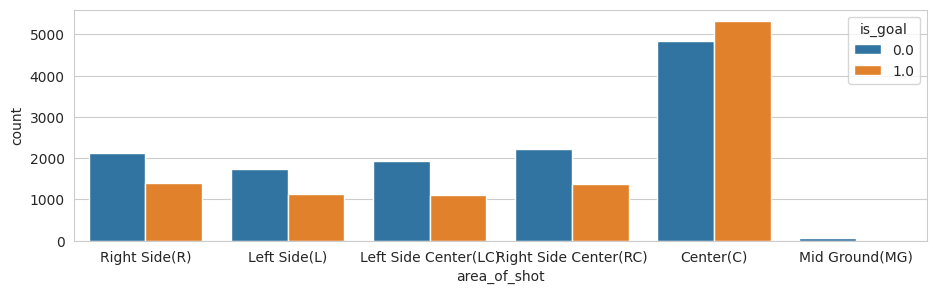

In [0]:
#GRAPH BELOW WILL SHOW AREA WHERE MAXIMUM GOAL'S ARE SCORED

fig, ax1 = plt.subplots(figsize=(11, 3))
sns.countplot(x=area_shot_df['area_of_shot'], hue=area_shot_df['is_goal'], data=area_shot_df, ax=ax1)

**Distance_of_shot column**

We have seen above ,a relationship was established with range_of_shot,shot_basics,area_of_shot ie area_of_shot fits in shot_basics and shot_basics fit in the bigger zone range_of_shot. But none of this gives us a precise location in the sub-zones from where the ball was exactly hit to score a goal. The exact location is given be this column. Let say a value '20' of distance_of_shot, this tells you that the ball was hit from a distance of 20 from the goal post. Putting all the columns together we can say that the goal was scored from a distance '20' from the 'center(c)' of the 'goal area' which is located at 'less than 8ft' from the goal post. Similarly we can relate other values of this columns.In a way we have now established a relationship between range_of_shot,shot_basics,area_of_shot,distance_of_shot.

The query to pre-analyze this column is given below. From the graph, we can see that distance '20' has the maximum goal scored


In [0]:
#Create data frame of distance_of_shot and is_goal feature.
df_dist=df[['distance_of_shot','is_goal']].copy()

In [0]:
df_dist.groupby(['distance_of_shot','is_goal']).agg({'is_goal':"count"})

is_goal
distance_of_shot is_goal         
20.0             0.0         1514
                 1.0         2630
21.0             0.0          156
                 1.0          307
22.0             0.0          203
...                           ...
90.0             0.0            2
91.0             0.0            1
94.0             0.0            3
97.0             0.0            1
99.0             0.0            1

[108 rows x 1 columns]

**2.Establish a relationship between the columns.**

While analyzing the individual column we have established a relation between range_of_shot,shot_basics,area_of_shot, and distance_of_shot. From the virtual zones, we now have an actual location from where the goal was scored ie values of the distance_of_shot column.

We will run the below query to see how the columns are related and dependend on each other.

**We can see that the distance_of_shot column is the driving column for range_of_shot,shot_basics,area_of_shot columns.Based on this in the below sub-section we will see how  distance_of_shot column will be used to replace the nan values of these columns.**

**Therefore these 4 columns will be part of the predictive model.**

From the virtual zones, we now have an actual location where the goal was scored. This location can also be represented in the form of coordinates given in location_x,location_y, lat/long columns. But we can see that distance_of_shot represents the same information as the location_x,location_y, lat/long columns, with this logic we had decided in the above section **4b** not to include these 3 columns thereby facilitating feature reduction.



In [0]:
#RUN THIS QUERY TO CREATE A DATA FRAM WITH THE 4 COLUMNS TO SHOW A RELATIONSHIP BETWEEN THEM.
dist_shots=df[['distance_of_shot','range_of_shot','area_of_shot','shot_basics','is_goal']].copy()

In [0]:
list(dist_shots.groupby(['distance_of_shot','is_goal']))

[((20.0, 0.0),
         distance_of_shot    range_of_shot area_of_shot shot_basics  is_goal
  25                 20.0  Less Than 8 ft.    Center(C)   Goal Area      0.0
  50                 20.0  Less Than 8 ft.    Center(C)   Goal Area      0.0
  62                 20.0  Less Than 8 ft.    Center(C)   Goal Area      0.0
  83                 20.0  Less Than 8 ft.    Center(C)   Goal Area      0.0
  114                20.0  Less Than 8 ft.    Center(C)   Goal Area      0.0
  ...                 ...              ...          ...         ...      ...
  30464              20.0  Less Than 8 ft.    Center(C)   Goal Area      0.0
  30527              20.0  Less Than 8 ft.    Center(C)   Goal Area      0.0
  30528              20.0  Less Than 8 ft.    Center(C)   Goal Area      0.0
  30671              20.0  Less Than 8 ft.    Center(C)   Goal Area      0.0
  30691              20.0  Less Than 8 ft.    Center(C)   Goal Area      0.0
  
  [1514 rows x 5 columns]),
 ((20.0, 1.0),
         distan

**3.Replace nan values of distance_of_shot with mode of the same column.**

We will run the below query to replace the nan values of the original (distance_of_shot). We will use the mode of the distance_of_shot column and not the duplicate columns. The reason being the duplicate column as many vague values when we relate with other columns eg as given below in the query output.

For 'less than 8ft' we have distance high as 106.4 which is not possible. Similarly for range '24+ft' distance cannot be low as 9.4

 Similarly, there are many such wrong values in distance_of_shot.1 (duplicate)column

In [0]:
df[['distance_of_shot','range_of_shot','distance_of_shot.1']][2208:2209]

,distance_of_shot,range_of_shot,distance_of_shot.1
2208,23.0,Less Than 8 ft.,106.4


In [0]:
df[['distance_of_shot','range_of_shot','distance_of_shot.1']][18223:18224]

,distance_of_shot,range_of_shot,distance_of_shot.1
18223,49.0,24+ ft.,9.4


In [0]:
##REPLACE NAN VALUES WITH MODE OF THE SAME COLUMN.
print('Nan values before mode for     ',df[['distance_of_shot']].isnull().sum()) 

#for ind,r in df.iterrows():
    
    #if math.isnan(r.get('distance_of_shot')):
mode_val=df['distance_of_shot'].mode().values[0]
df['distance_of_shot'] = df['distance_of_shot'].replace({ np.nan:mode_val})
      
      #df.at[ind,'distance_of_shot']=r.get('distance_of_shot.1')



#Since there are still 97 row with NaN.May be both the columns have  NaN  therefore it cannot replace NaN Vvalues.Therefore replacing value with the mode of distance_of_shot column

        


Nan values before mode for      distance_of_shot    1567
dtype: int64


In [0]:
print('Nan values after mode for ',df[['distance_of_shot']].isnull().sum()) 

Nan values after mode for  distance_of_shot    0
dtype: int64


**4.Replace the nan values of area_of_shot,range_of_shot,shot_basics with respect to their corresponding distance_of_shot.**

We will replace nan for these columns using the distance_of_shot column.
For eg. for column range_of_shot.We will create a temporary data frame consisting of 2 columns 'distance_of_shot, 'range_of_shot'. We will apply the group by on distance_of_shot given range_of_shot. As an output(given below), every distance is associated with a particular range. So a for a row with nan value in range_of_shot, the corresponding distance_of_shot value will be matched with the group by data, and the corresponding range_of_shot from the group by data will be replaced with nan value in the actual range_of_shot column.

The same process will be done for other columns.


Below is an example of the group by query output which is the base to replace the actual column values.

We will perform the replacement on nan values of all the columns in for a loop in the below sub-section.



In [0]:
temp=df[['distance_of_shot','range_of_shot']].copy()
grp=temp.groupby(['distance_of_shot'])['range_of_shot']
list(grp)

[(20.0, 4        Less Than 8 ft.
  6        Less Than 8 ft.
  12              8-16 ft.
  16       Less Than 8 ft.
  19       Less Than 8 ft.
                ...       
  30678    Less Than 8 ft.
  30679    Less Than 8 ft.
  30680    Less Than 8 ft.
  30691    Less Than 8 ft.
  30693    Less Than 8 ft.
  Name: range_of_shot, Length: 6825, dtype: object),
 (21.0, 34       Less Than 8 ft.
  35       Less Than 8 ft.
  51       Less Than 8 ft.
  977      Less Than 8 ft.
  1147     Less Than 8 ft.
                ...       
  30246    Less Than 8 ft.
  30263    Less Than 8 ft.
  30637    Less Than 8 ft.
  30649    Less Than 8 ft.
  30656    Less Than 8 ft.
  Name: range_of_shot, Length: 597, dtype: object),
 (22.0, 7        Less Than 8 ft.
  44       Less Than 8 ft.
  400      Less Than 8 ft.
  1152     Less Than 8 ft.
  1156     Less Than 8 ft.
                ...       
  30377    Less Than 8 ft.
  30398    Less Than 8 ft.
  30643    Less Than 8 ft.
  30660    Less Than 8 ft.
  30665    Le

In [0]:
print('Nan values before replacing for ',df[['range_of_shot','shot_basics','area_of_shot']].isnull().sum()) 
#MAKE A LIST OF COLUMN FOR WHICH YOU NEED TO REPLACE THE NAN VALUES
replace_nan=['shot_basics','range_of_shot','area_of_shot']

for col in replace_nan:

  replace_col_df=df[['distance_of_shot',col]].copy()
  grp=replace_col_df.groupby(['distance_of_shot'])[col]
  df[col]=df.apply(lambda x : grp.get_group(float(x['distance_of_shot'])).mode().values[0] if pd.isnull(x[col])else x[col],axis=1)


Nan values before mode for  range_of_shot    1564
shot_basics      1575
area_of_shot     1502
dtype: int64


In [0]:
print('Nan values after replacing for ',df[['range_of_shot','shot_basics','area_of_shot']].isnull().sum()) 

Nan values after mode for  range_of_shot    0
shot_basics      0
area_of_shot     0
dtype: int64


**4g)Team_Name column and Team_id columns**

Both the columns consist of the same value (1610612747, Manchester United) for all the rows of the data set. There is no pattern that we can study, therefore it cannot contribute to predicting the scoring of the goals.Thereby both columns will be excluded while building a predictive model.

**4h)Game_season and Game_of_date columns (match_id column will be used to along to analysis further, refer section 4a)**


The column game_season contains a value in the form of eg '2000-01', where the first part is the year the game was played followed by 01 an identifier for the match. From this, the year we can extract from the date_of_game column and identifier serves no purpose in predicting scoring of a goal. Therefore this column will not be included in the predictive algorithm.

From the data_of_game column, we get some basic information like the match season spans from October – June and year span from 1996-2013. These detail will be further analyzed.

The column date_of_game, as a whole, will not be used rather we will extract the month and year from the values. The month and year along with the match_id will then be used to further analyze. We will be able to analyze the performance of the player month and year wise. Both analyses will give us a pattern of players' performance like which months he performed the best or year when his performance was at the pick. There are possibilities the weather of certain months may/may not suit him or initial years he performed well and later it slowed down etc. Such or similar patterns will help us in predicting the scoring of a goal. Therefore this column will be used along with match_id  to get a performance report.

This column will be included in the predictive model.

To begin with, we need to replace the nan values of this column. For the same match_id's we have the same date in date_of_game column. Using this logic, for a given row having a nan value, we will get the match_id, compare this match_id with the same such value in the dataset, get the corresponding date from the date_of_game column. This value will be used to replace the nan of that given row. 

We will then run the below query to extract the month and year from the values.Create 2 new columns 'month_name and 'year'. Later drop the original date_of_game column.

Thereafter run the query to get the detail of goal scored month and year wise.

In [0]:
#Replace the nan value of the date_of_game column my comparing the match_id. 
#The same match_id will have the same date in the date_of_game column. Therefore compare the match_id of the given row with all the match_id's in the data frame.
# For the matching value get the corresponding date from the date_of_game column.

print('Nan values before replacing for ',df[['date_of_game']].isnull().sum()) 

for ind,r in df.iterrows():
    
    if r.get('date_of_game') is np.nan:
        
        lst=list(df['date_of_game'][df['match_id']==r.get('match_id')]) # Certain match_id have a single value.
        if len(lst)==1:                                                #Check if the match_id has a single value.
            df.at[ind,'date_of_game']=df['date_of_game'].mode().values[0]
        else:
            df.at[ind,'date_of_game']=df['date_of_game'][df['match_id']==r.get('match_id')].mode().values[0]


Nan values before replacing for  date_of_game    1550
dtype: int64


In [0]:
print('Nan values after replacing for  ',df[['date_of_game']].isnull().sum()) 

Nan values after replacing for   date_of_game    0
dtype: int64


In [0]:
#Extract month and year from the values. Create 2 new columns 'month_name and 'year'

mon=pd.to_datetime(df['date_of_game'],format='%m/%d/%Y')
df['month_name']=mon.dt.month_name()
df['year']=mon.dt.year

#Drop the date_of_game column

df.drop('date_of_game', axis=1, inplace=True)


In [0]:
#Create datframe having match_id,month_name and is_goal. Get details of matches played monthwise

mon_match=pd.DataFrame(df[['month_name','match_id','is_goal']])
mon_match.groupby(['month_name']).agg({'match_id':"count"})


,match_id
month_name,
April,3813
December,4922
February,4103
January,4654
June,877
March,5132
May,2562
November,4251
October,383


In [0]:
#Get the data of goal=1 monthwise.Both the output is copied to excel to get a % wise report
mon_match[mon_match['is_goal']==1].groupby(['month_name']).agg({'is_goal':"count"})

,is_goal
month_name,
April,1319
December,1739
February,1490
January,1669
June,298
March,1791
May,939
November,1498
October,136


**Month wise details of the goal's ,matches played and % of goal scored**



<figure>
<center>
<img src='https://drive.google.com/uc?id=1lxE19dyKX6LTdKp-bhT_mYE-HrS4kHUm' />
<figcaption>Image Caption</figcaption></center>
</figure>






In [0]:
#Create datframe having match_id,year and is_goal. Get details of matches played yearwise

year_match=pd.DataFrame(df[['year','match_id','is_goal']])
year_match.groupby(['year']).agg({'match_id':"count"})


,match_id
year,
1996,86
1997,760
1998,619
1999,1182
2000,2047
2001,1662
2002,2215
2003,1961
2004,1779


In [0]:
#Get the data of goal=1 yearwise.Both the output is copied to excel to get a % wise report
year_match[mon_match['is_goal']==1].groupby(['year']).agg({'is_goal':"count"})

,is_goal
year,
1996,22
1997,257
1998,202
1999,428
2000,766
2001,618
2002,782
2003,667
2004,613


**Year wise details of the goal's ,matches played and % of goal scored**



<figure>
<center>
<img src='https://drive.google.com/uc?id=1yNW54lm0asOziNFDTdop08hH6kpzP_N3' />
<figcaption>Image Caption</figcaption></center>
</figure>


As we see from the report, the performance of the player both month and year wise is consistent. The goal scored is proportionate to the number of matches played. There are no major changes in the number of goals scored with the increase/decrease of matches. Here we can see a relation between game_of_date and match_id column. Since the performance of the player is consistent, the exclusion and inclusion of the column will be checked for the change in the accuracy of the predictive model.

**4i) Home/Away column**

This column list the opponent team name with whom the player has played in his career. We will analyze the maximum number of games played and the goal scored with each of the team. This detail will help us understand the performance of the player each time with a given team. Therefore this column will help in predicting the scoring of the goal.

Since this column also has nan values, we will replace the nan values based on the match_id column. For the same match_id, we have the same team name in the dataset. Using this logic, for a given row having nan values, we will match the match_id of that row with the same match_id in the dataset, from the matching rows get the mode of the team name. This value will be used to replace the nan value of the given row.

This column has values in different formats like 'MANU @ POR' or 'MANU vs'. Both this format has 1 thing in common, 'POR' ie team name. We will, therefore, extract only the team name from the row values and populate in a new column 'opponent'.Later will drop the original column 'home/away'.


Below we have the queries to extract the team name and thereafter.

In [0]:
#Replace the nan value of the home/away column my comparing the match_id.Same match_id will have same value for
#home/away column. Therefore compare the match_id of the given row with match_id's in match_id column in the data frame. 
#Get the mode of all the matching match_id,replace this value for nan in the given row.

print('Nan values before replacing for ',df[['home/away']].isnull().sum()) 

for ind,r in df.iterrows():
    
    if r.get('home/away') is np.nan:
        df.at[ind,'home/away']=df['home/away'][df['match_id']==r.get('match_id')].mode().values[0]

Nan values before replacing for  home/away    1497
dtype: int64


In [0]:
print('Nan values after replacing for ',df[['home/away']].isnull().sum()) 

Nan values after replacing for  home/away    0
dtype: int64


In [0]:
# From  home/away column extract the team name and populated into a new column 'opponent
df['opponent']=df['home/away'].apply(lambda y: y[-3:] if not isinstance(y, float)else y)

In [0]:
#Drop the home/away column.Hence forth opponent(team name) column will be used for further analysis.
df.drop('home/away', axis=1, inplace=True)

In [0]:
#Create data frame with opponent feature and is_goal feature 
home=df[['opponent','is_goal','match_id']].copy()

Text(0, 0.5, 'Goal Count')

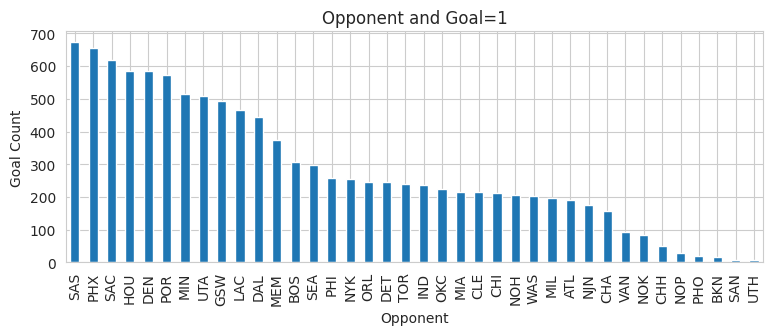

In [0]:
#Create bar graph with opponent column and is_goal=1
alpha = 0.02
plt.figure(figsize=(9,3))
home['opponent'][home['is_goal']==1].value_counts().plot(kind='bar')
plt.title('Opponent and Goal=1')
plt.xlabel('Opponent')
plt.ylabel('Goal Count')

As we see from the graph, the maximum number of goals scored is with team SAS. Similarly, we can see the relationship between goal scored and opponent. **Therefore this column will help in predicting the score and will be included in the predicted model. replace the nan values as explained above.**

**4j)Shot_id column.**

This column holds only index values for the type_of_shot column. This will therefore not contribute towards predicting if the goal will be scored of not. Thereby this column will be included for building a predictive model.

**4k)Type_of_shot and type_of_combined_shot**

These columns tell you what kind of shot was used to hit the ball. Multiple numbers of shots can be used to hit the ball. The type of shot the player will play can depend on multiple factors. For example, pass off a shot, penalty shot, the zone, and the side of the zone on the ground the player is, distance from that zone to the goal post, etc.

At any given point in time, either the ball is hit with 1 kind of shot or with multiple shot combined as 1 (eg you have a ball coming on the chest, then slide the ball down to thighs, from there slide gradually to the feet), therefore if the column type_of_shot has a value, the type_of_combined_shot would have a nan value. Based on this logic, to replace the nan values of these columns we will use the value of the other column having a valid value.

Once the nan values are replaced we will convert the column values to more meaningful eg for type_of_shot we will replace 'shot-1' to 'tc-1' etc. For type_of_combined_shot column we will replace 'shot-1' to 'cs-1' etc.

The query to replace the nan and modify the values is given below.

The column helps in predicting the scoring of the goal, but to what extent it is difficult to say. Therefore exclusion and inclusion of these columns should be checked for accuracy of the predictive model.



In [0]:
#Replace the values with meaning full name eg for shot-3 ,for type_of_shot we will replace with 'ts-3 and for
#type_of_combined_shot we will replace with 'cs-3'


for ind,r in df.iterrows():
    val=''
    val1=''
    new_val=''
    new_val1=''
    
    if r.get('type_of_combined_shot') is not np.nan:
    
        val=r.get('type_of_combined_shot')
        new_val=val.replace('shot','cs')
        df.at[ind,'type_of_combined_shot']=new_val
        
    if r.get('type_of_shot') is not np.nan:
        val1=r.get('type_of_shot')
        new_val1=val1.replace('shot','ts')
        df.at[ind,'type_of_shot']=new_val1

In [0]:
#For nan values,the column having nan value will be replaced with values of the other column with valid value.
print('Nan values before replacing for ',df[['type_of_shot']].isnull().sum()) 
print('Nan values before replacing for ',df[['type_of_combined_shot']].isnull().sum()) 

for ind,r in df.iterrows():
    val=''
    val1=''
    
    if r.get('type_of_shot') is np.nan:
        
        val=r.get('type_of_combined_shot')
        df.at[ind,'type_of_shot']=val.replace('cs','ts')
              
    if r.get('type_of_combined_shot') is np.nan:
        val=r.get('type_of_shot')
        df.at[ind,'type_of_combined_shot']=val.replace('ts','cs')
              

Nan values before replacing for  type_of_shot    15280
dtype: int64
Nan values before replacing for  type_of_combined_shot    15417
dtype: int64


In [0]:
print('Nan values after replacing for ',df[['type_of_shot']].isnull().sum()) 
print('Nan values after replacing for ',df[['type_of_combined_shot']].isnull().sum()) 

Nan values after replacing for  type_of_shot    0
dtype: int64
Nan values after replacing for  type_of_combined_shot    0
dtype: int64


**4l) remaining_min.1,remaining_sec.1,power_of_shot.1,knockout_match.1,distance_of_shot.1  columns**.

These are duplicate columns with the same name as the original columns. These columns will not be used reason being there are certain values here which are vague and not in the range they should be ie the kind of data they should hold(eg remaining_sec.1 has values greater than 60, seconds cannot be more than 60).
Instead, these columns shall be used to replace the nan values of the original columns(appropriate values).

These columns will not be part of the predictive algorithm.

**CONCLUSION**

We analysed all the columns of this data set.Based on the study we have come up with a list of columns.

The list are as given below,

**A)** These columns are very important and will be the core of predictive models.

1. Match_id.
2. Remaining_min.
3. Remaining_sec.
4. Distance_of_shot
4. Range_of_shot
6. Shot_basics
7. Area_of_shot
8. Game_of_date
9. Home/away
10. is_goal


**B)** Inclusion and exclusion of these columns will be checked to see the change in accuracy.

1. Power_of_shot
2. Knockout_match
3. Type_of_shot 
4. Type_of_combined_shot


**C)** This list of columns will have no role in predicting the scoring of the goal.

1.   Match_event_id
2.   Location_x
3.   Location_y
4.   Game_of_season
5.   Team_name
6.   Team_id
7.   lat/lng
8.   Shot_id
9.   Remaining_min.1
10.  Remaining_sec.1
11.  Power_of_shot.1
12.  Knockout_match.1
13.  Distance_of_shot.1











